In [1]:
import pandas as pd
from datetime import datetime,timedelta
import yfinance as yf

In [2]:
transactions_df = pd.read_csv("Resources/Transactions.csv", parse_dates=True, infer_datetime_format=True)

In [3]:
def get_price(date,currency):
    pair=currency+"-AUD"
    data = yf.download(pair,date,date + timedelta(days=1))
    return data.iloc[0,4]
    
def calculate_daily_value(date,summary_portfolio_df):
    amount_aud = 0
    for index, row in summary_portfolio_df.iterrows(): 
        aud_price = get_price(date,index)
        amount_aud += row['Amount'] * aud_price
    
    return amount_aud

def update_holdings(current_holdings, new_transactions):
    for index, row in new_transactions.iterrows():
        #parse the row
        date = datetime.strptime(row['Date'], '%Y-%m-%d')
        currency = row['Currency']
        if row['Transaction'] == 'SELL':
            amount = -row['Amount']
        else:
            amount = row['Amount']

        if not currency in current_holdings.index:
            new_row = pd.DataFrame({'Currency':[currency], 'Amount':[amount]})
            new_row.set_index('Currency',inplace=True)
            current_holdings = pd.concat([current_holdings,new_row])
        else:
            current_holdings.loc[currency, 'Amount'] += amount 
    
    #return the updated holdings
    return current_holdings

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

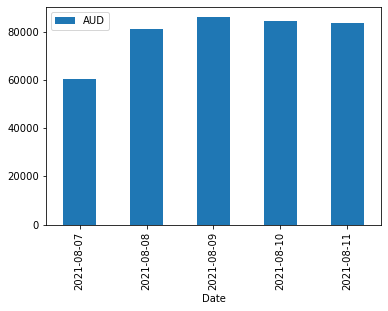

In [10]:
#1. Generate all dates
start_date=transactions_df.iloc[0,0]
end_date=transactions_df.iloc[len(transactions_df)-1,0]
portfolio_daily_view = pd.DataFrame({'Date': pd.date_range(start_date, end_date), 'AUD':0})
portfolio_daily_view['Date']=portfolio_daily_view['Date'].dt.strftime('%Y-%m-%d')
portfolio_daily_view.set_index('Date',inplace=True)

#2. generate summary of holdings
holdings_df = pd.DataFrame(columns=['Currency','Amount'])
holdings_df.set_index('Currency',inplace=True)

#3. For every date
for index, row in portfolio_daily_view.iterrows():    
    #prepare data
    date = datetime.strptime(index, '%Y-%m-%d')
    
    #1. Check if transactions exists: 
    daily_transactions = transactions_df.loc[transactions_df['Date'] == index]
    # if yes, update total balance of coins
    if len(daily_transactions) > 0:
        holdings_df=update_holdings(holdings_df, daily_transactions)
    
    #2. Calcualte AUD balance
    portfolio_daily_view.loc[index,'AUD'] = calculate_daily_value(date,holdings_df)
    
portfolio_daily_view.plot(kind='bar')

In [9]:
portfolio_daily_view.head()

,AUD
Date,
2021-08-07,60584.707031
2021-08-08,81278.748123
2021-08-09,85922.090378
2021-08-10,84571.244171
2021-08-11,83592.386787
